In [77]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns

In [78]:
warnings.filterwarnings('ignore')

In [79]:
all_files = glob.glob(r"../../bases/car_theft/*.xls")
df = pd.concat((pd.read_csv(f, sep='\t', encoding='UTF-16 LE') for f in all_files), ignore_index=True)

In [80]:
df.to_csv('../../bases/roubos_consolidado.csv', index=False)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826347 entries, 0 to 826346
Data columns (total 54 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ANO_BO                    826347 non-null  int64  
 1   NUM_BO                    826347 non-null  int64  
 2   NUMERO_BOLETIM            826347 non-null  object 
 3   BO_INICIADO               826347 non-null  object 
 4   BO_EMITIDO                826347 non-null  object 
 5   DATAOCORRENCIA            826342 non-null  object 
 6   HORAOCORRENCIA            797897 non-null  object 
 7   PERIDOOCORRENCIA          826347 non-null  object 
 8   DATACOMUNICACAO           826347 non-null  object 
 9   DATAELABORACAO            826347 non-null  object 
 10  BO_AUTORIA                826347 non-null  object 
 11  FLAGRANTE                 826347 non-null  object 
 12  NUMERO_BOLETIM_PRINCIPAL  79150 non-null   object 
 13  LOGRADOURO                757803 non-null  o

In [82]:
df.columns = df.columns.str.lower()

In [83]:
df['dataocorrencia'].str.slice(6, 10).unique()

array(['2015', '2016', '2012', '2014', '1998', '2010', '2013', '2009',
       '2008', '1985', '2003', '2011', '1996', '1997', '2007', '2004',
       '2006', '1978', '2001', '2002', '1964', '2000', '1991', '1987',
       '1958', '1966', '1992', '1948', '2017', '1984', '2005', '1971',
       '1981', '1972', '1968', '1995', '1974', '1975', '2018', '1994',
       '1983', '2019', '1019', '1999', '1988', '1982', '1989', '1986',
       '1960', '1919', '2020', nan, '1970', '1977', '1990', '0202',
       '2021', '1202', '1980', '0201', '2022'], dtype=object)

In [84]:
df[pd.to_datetime(df['dataocorrencia'], errors='coerce').isnull()]

,ano_bo,num_bo,numero_boletim,bo_iniciado,bo_emitido,dataocorrencia,horaocorrencia,peridoocorrencia,datacomunicacao,dataelaboracao,...,placa_veiculo,uf_veiculo,cidade_veiculo,descr_cor_veiculo,descr_marca_veiculo,ano_fabricacao,ano_modelo,descr_tipo_veiculo,quant_celular,marca_celular
520683,2019,151314,151314/2019,04/02/2019 07:28:56,04/02/2019 07:29:25,23/01/1019,06:35,PELA MANHÃ,04/02/2019,04/02/2019 07:28:56,...,EAN3117,SP,MAUÁ,Preta,NaN,NaN,NaN,AUTOMOVEL,NaN,NaN
520856,2019,154558,154558/2019,04/02/2019 15:30:49,04/02/2019 15:31:19,23/01/1019,12:50,A TARDE,04/02/2019,04/02/2019 15:30:49,...,FSX7457,SP,SÃO PAULO,Preta,FORD/ECOSPORT TIT AT 2.0,2013.0,NaN,AUTOMOVEL,NaN,NaN
520974,2019,155807,155807/2019,04/02/2019 22:52:04,04/02/2019 22:52:15,23/01/1019,06:35,PELA MANHÃ,04/02/2019,04/02/2019 22:52:04,...,EAN3117,SP,MAUÁ,Preta,FORD/FIESTA SEDAN1.6FLEX,2007.0,NaN,AUTOMOVEL,NaN,NaN
533701,2019,349376,349376/2019,15/03/2019 02:43:56,15/03/2019 02:44:39,02/03/1019,19:28,A NOITE,15/03/2019,15/03/2019 02:43:56,...,FDH5373,SP,SÃO PAULO,Prata,NaN,2012.0,NaN,AUTOMOVEL,NaN,NaN
547841,2019,528591,528591/2019,23/04/2019 18:16:43,23/04/2019 18:16:15,10/04/1019,21:25,A NOITE,23/04/2019,23/04/2019 18:16:43,...,DUI2113,SP,MAUÁ,Prata,PEUGEOT/206 14 PRESEN FX,2006.0,NaN,AUTOMOVEL,NaN,NaN
659865,2020,903,903/2020,13/04/2020 17:10:23,13/04/2020 18:05:12,NaN,15:50,A TARDE,13/04/2020,13/04/2020 17:10:23,...,EGH0621,SP,PORTO FERREIRA,Branco,VW/GOL 1.0,2009.0,2010.0,AUTOMOVEL,NaN,NaN
659869,2020,1236,1236/2020,13/04/2020 17:17:32,13/04/2020 18:24:58,NaN,12:16,A TARDE,13/04/2020,13/04/2020 17:17:32,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
659870,2020,1236,1236/2020,13/04/2020 17:17:32,13/04/2020 18:24:58,NaN,12:16,A TARDE,13/04/2020,13/04/2020 17:17:32,...,CPZ1483,SP,ITAPECERICA DA SERR,Branco,FIAT/FIORINO IE,2000.0,2000.0,CAMINHONETE,NaN,NaN
659871,2020,1236,1236/2020,13/04/2020 17:17:32,13/04/2020 18:24:58,NaN,12:16,A TARDE,13/04/2020,13/04/2020 17:17:32,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
659872,2020,1236,1236/2020,13/04/2020 17:17:32,13/04/2020 18:24:58,NaN,12:16,A TARDE,13/04/2020,13/04/2020 17:17:32,...,CPZ1483,SP,ITAPECERICA DA SERR,Branco,FIAT/FIORINO IE,2000.0,2000.0,CAMINHONETE,NaN,NaN


In [85]:
df['data_hora'] = pd.to_datetime(df['dataocorrencia']+' '+df['horaocorrencia'], errors='coerce')

In [86]:
df['cidade'].nunique()

550

In [87]:
df['bairro'].unique()

array(['JARDIM SAN MARTINS', 'CIDADE DUTRA', 'BRASILANDIA', ...,
       'jardim angélica', 'Jardim Beirute', 'Loteamento Jardim Primavera'],
      dtype=object)

In [88]:
df['cidade'] = df['cidade'].str.upper()

In [89]:
df['bairro'] = df['bairro'].str.upper()

In [90]:
df['ano'] = df['data_hora'].dt.year
df['mes'] = df['data_hora'].dt.month
df['dia'] = df['data_hora'].dt.day

<Axes: >

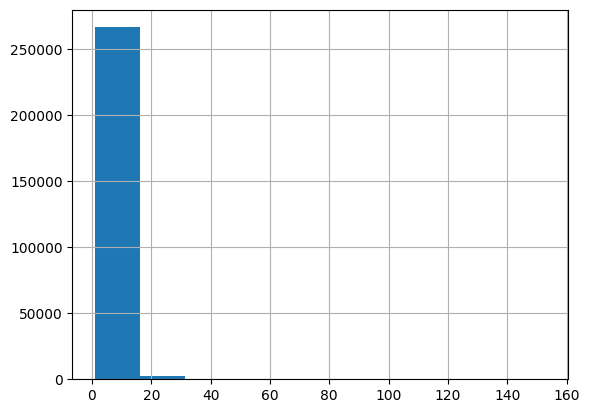

In [91]:
df.groupby(['cidade', 'bairro', 'ano', 'mes', 'dia']).size().hist()

<Axes: >

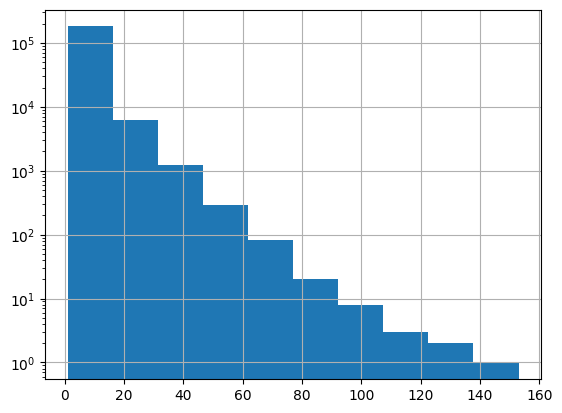

In [92]:
df.groupby(['cidade', 'bairro', 'mes', 'dia']).size().hist(log=True)

<Axes: >

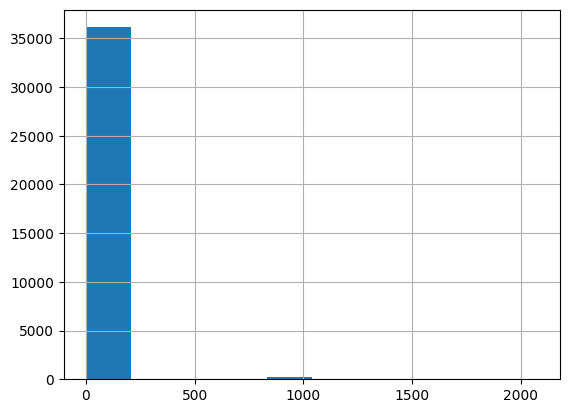

In [93]:
df.groupby(['cidade', 'mes', 'dia']).size().hist()

<Axes: xlabel='ano,mes,dia'>

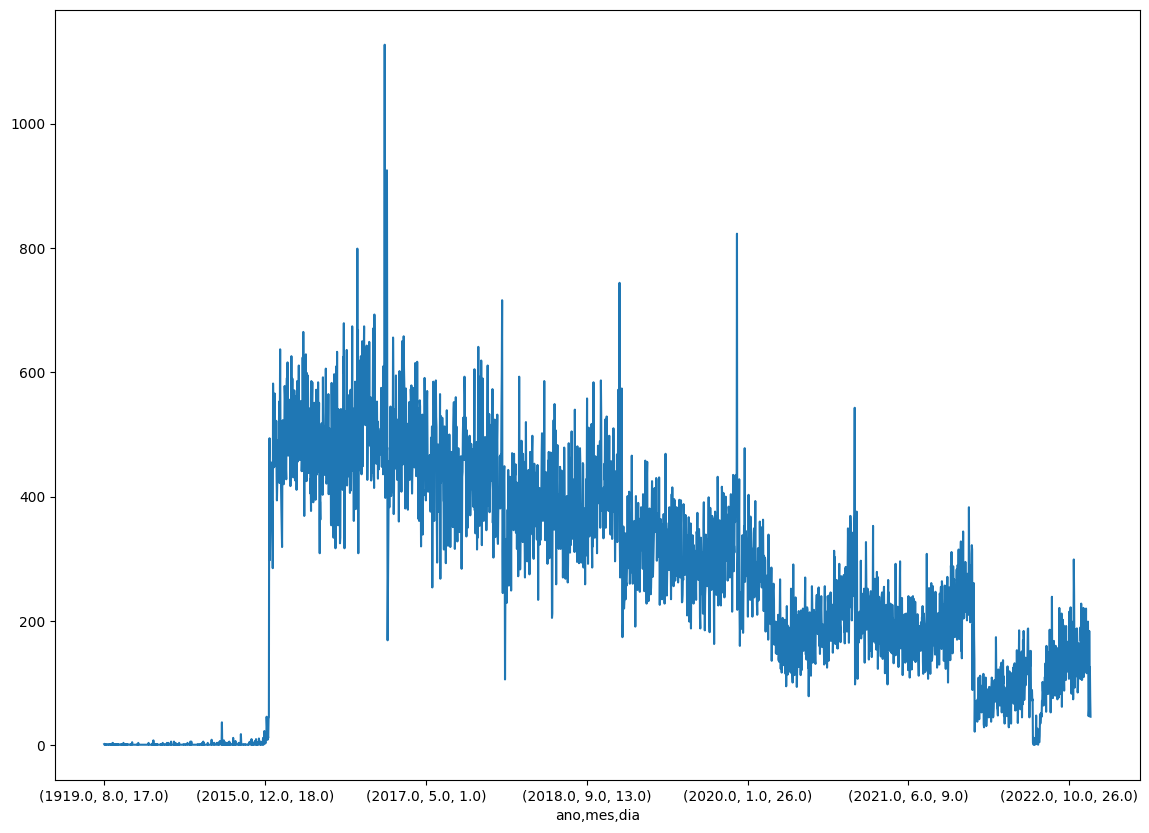

In [94]:
df.groupby(['ano', 'mes', 'dia']).size().plot(figsize=(14, 10))

<Axes: title={'center': '2022'}, xlabel='ano,mes,dia'>

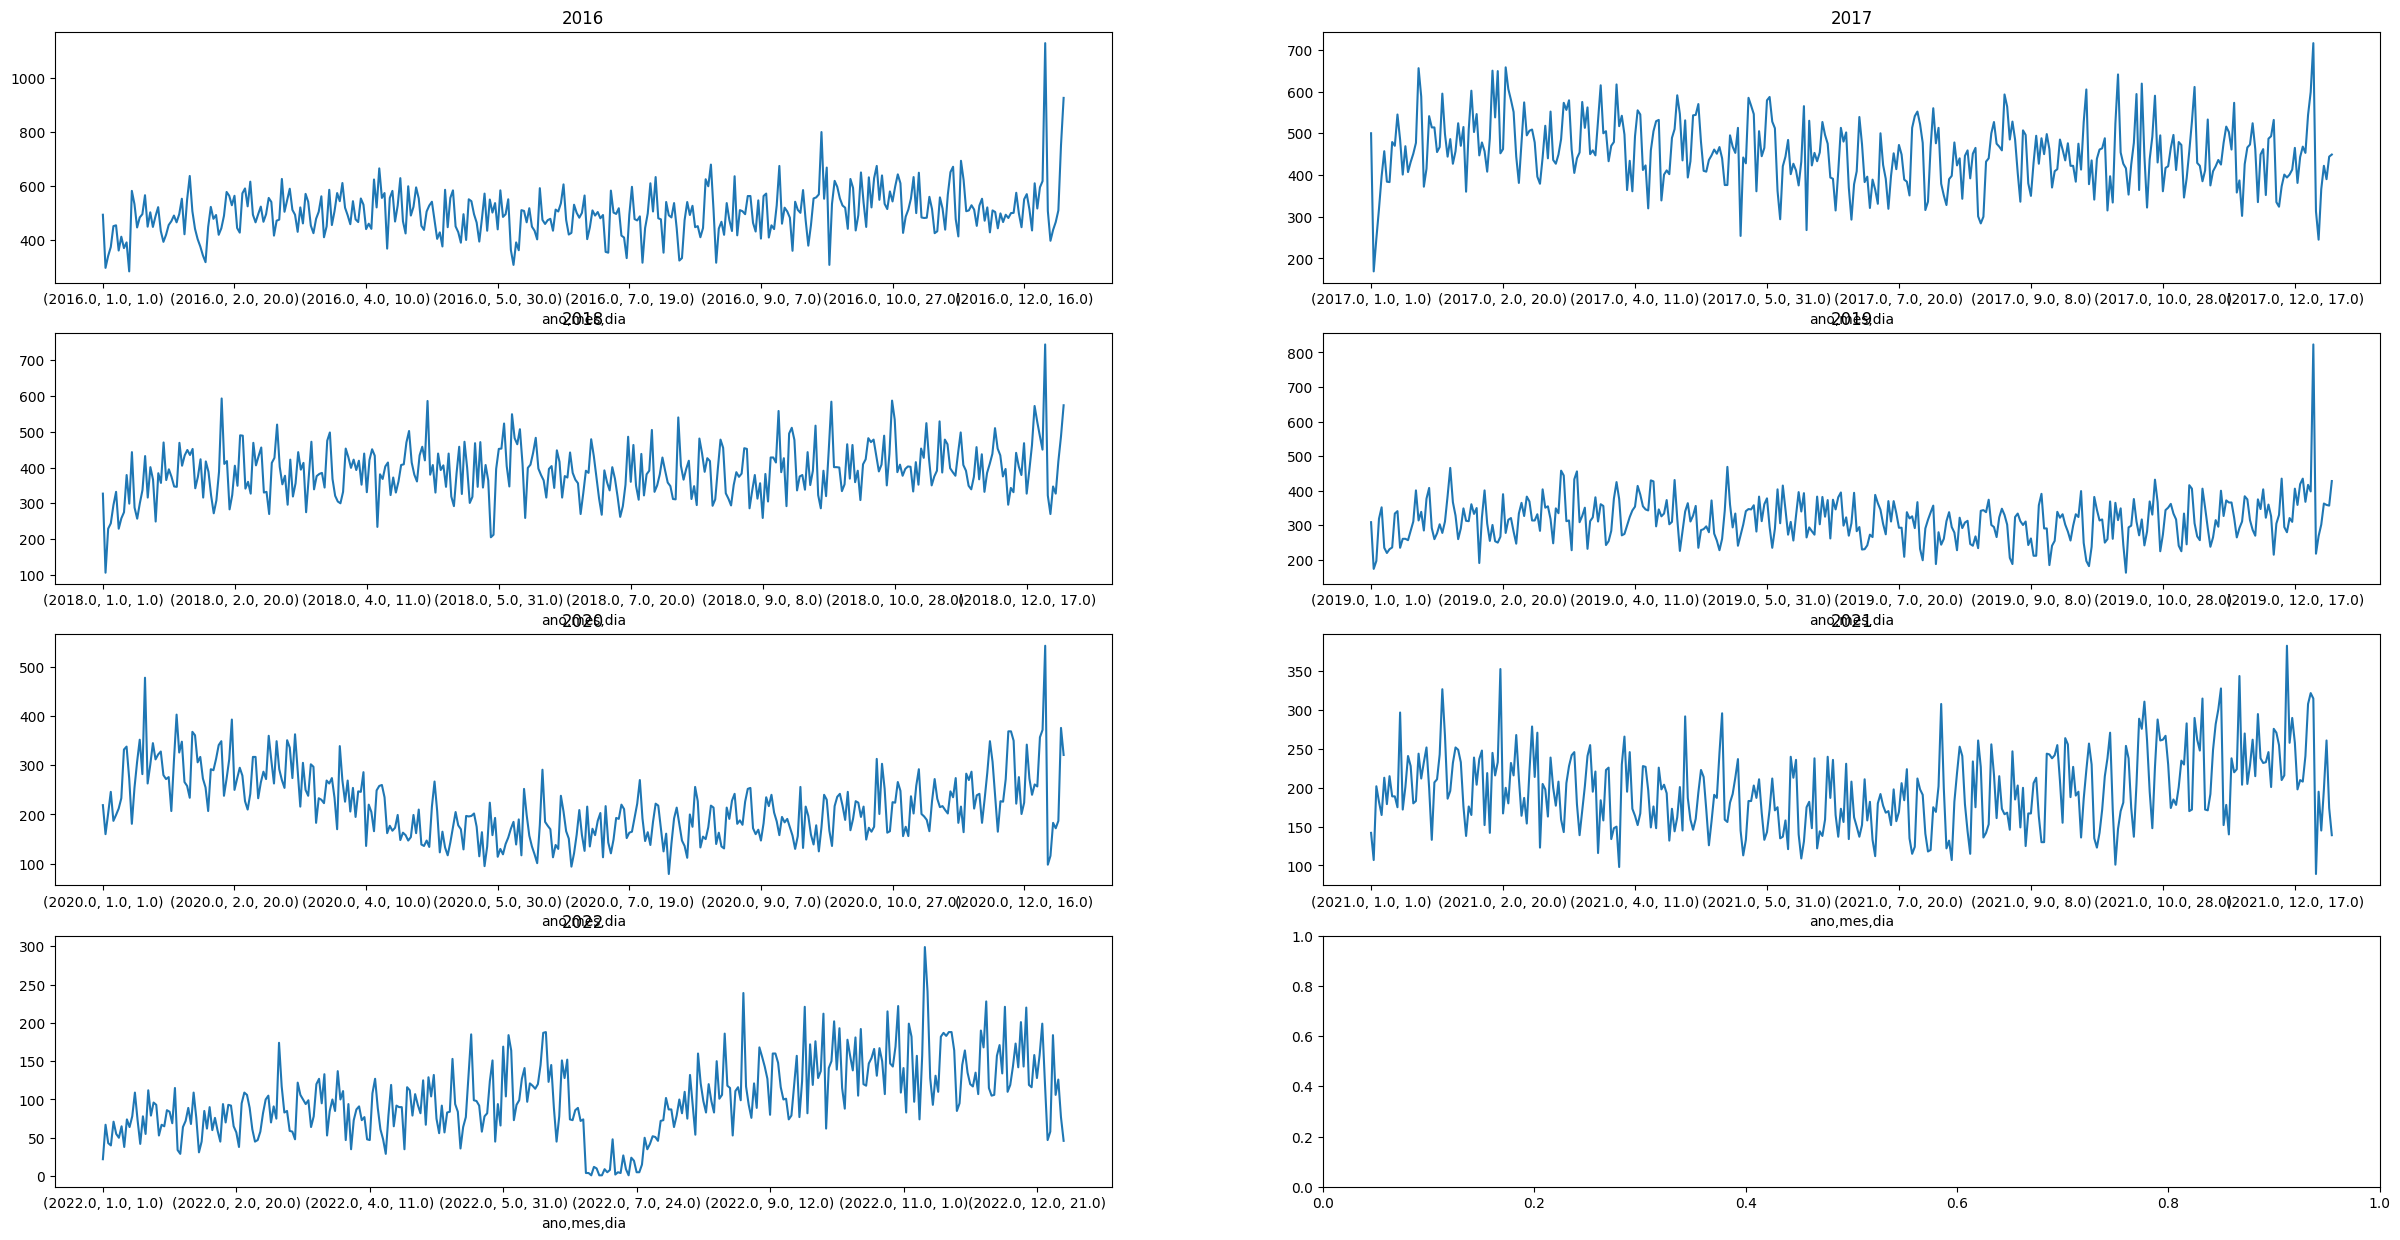

In [95]:
fig, ax = plt.subplots(4, 2, figsize=(30, 15))
ax[0, 0].set_title(2016)
df[df['ano'] == 2016].groupby(['ano', 'mes', 'dia']).size().plot(ax=ax[0, 0])

ax[0, 1].set_title(2017)
df[df['ano'] == 2017].groupby(['ano', 'mes', 'dia']).size().plot(ax=ax[0, 1])

ax[1, 0].set_title(2018)
df[df['ano'] == 2018].groupby(['ano', 'mes', 'dia']).size().plot(ax=ax[1, 0])

ax[1, 1].set_title(2019)
df[df['ano'] == 2019].groupby(['ano', 'mes', 'dia']).size().plot(ax=ax[1, 1])

ax[2, 0].set_title(2020)
df[df['ano'] == 2020].groupby(['ano', 'mes', 'dia']).size().plot(ax=ax[2, 0])

ax[2, 1].set_title(2021)
df[df['ano'] == 2021].groupby(['ano', 'mes', 'dia']).size().plot(ax=ax[2, 1])

ax[3, 0].set_title(2022)
df[df['ano'] == 2022].groupby(['ano', 'mes', 'dia']).size().plot(ax=ax[3, 0])

In [96]:
roubos_dia = df[df['ano'].isin([2016, 2017, 2018, 2019, 2020, 2021, 2022])].groupby(pd.Grouper(key='data_hora', freq='D')).size()

In [97]:
import statsmodels.api as sm

In [98]:
decompose = sm.tsa.seasonal_decompose(roubos_dia, model='additive', period=30)

<Figure size 2000x1000 with 0 Axes>

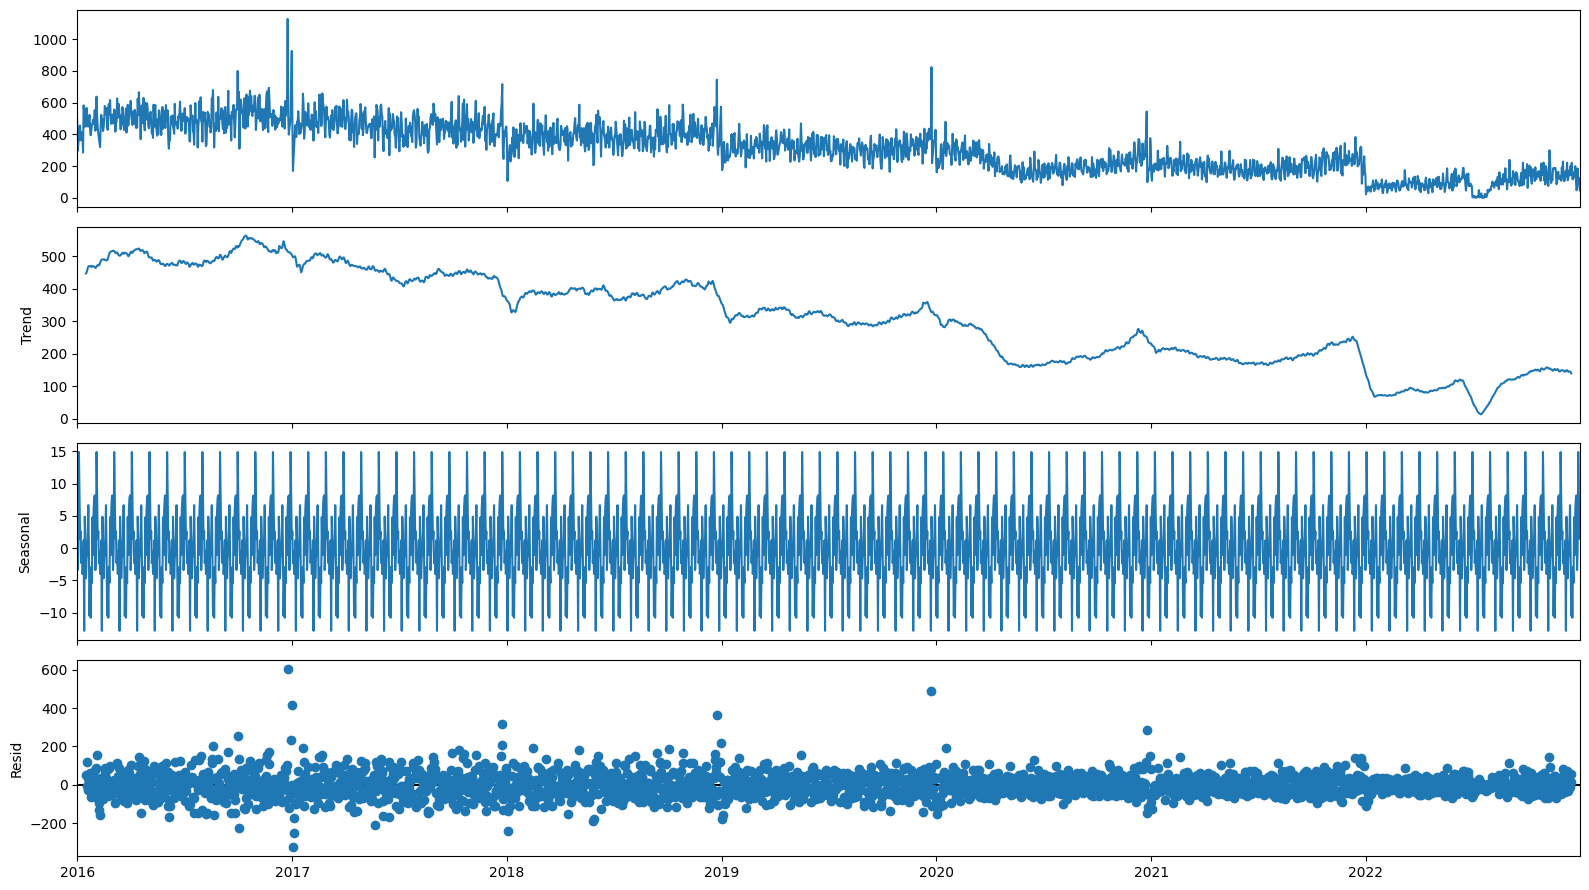

In [99]:
plt.figure(figsize=(20, 10))
fig = decompose.plot()
fig.set_size_inches((16, 9))
plt.tight_layout()

In [100]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf

In [101]:
adf = adfuller(roubos_dia)
kps = kpss(roubos_dia)

In [102]:
print("ADF")
print(f"Statistics {adf[0]}")
print(f"p-value {adf[1]}")
print()
print("KPSS")
print(f"Statistics {kps[0]}")
print(f"p-value {kps[1]}")

ADF
Statistics -1.0789593127674209
p-value 0.7233893432734609

KPSS
Statistics 8.054255408363364
p-value 0.01


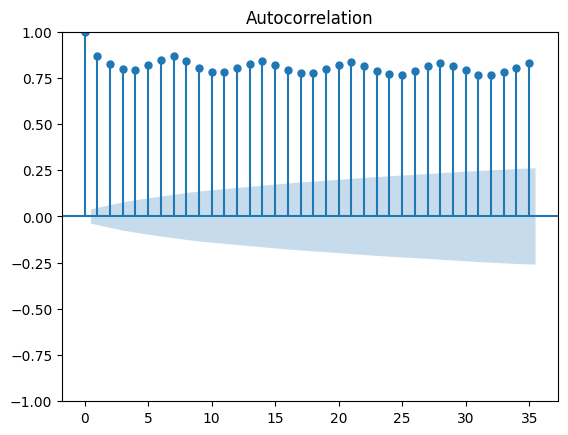

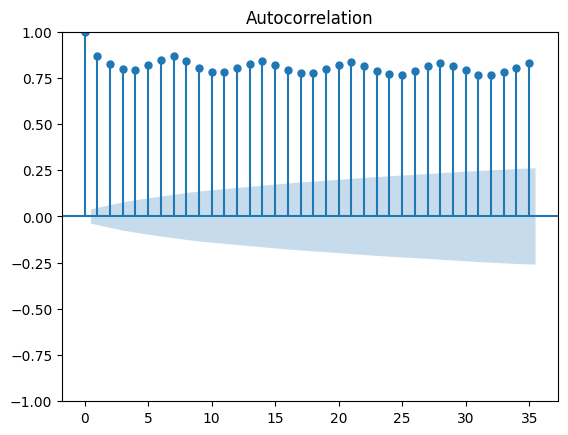

In [103]:
plot_acf(roubos_dia)

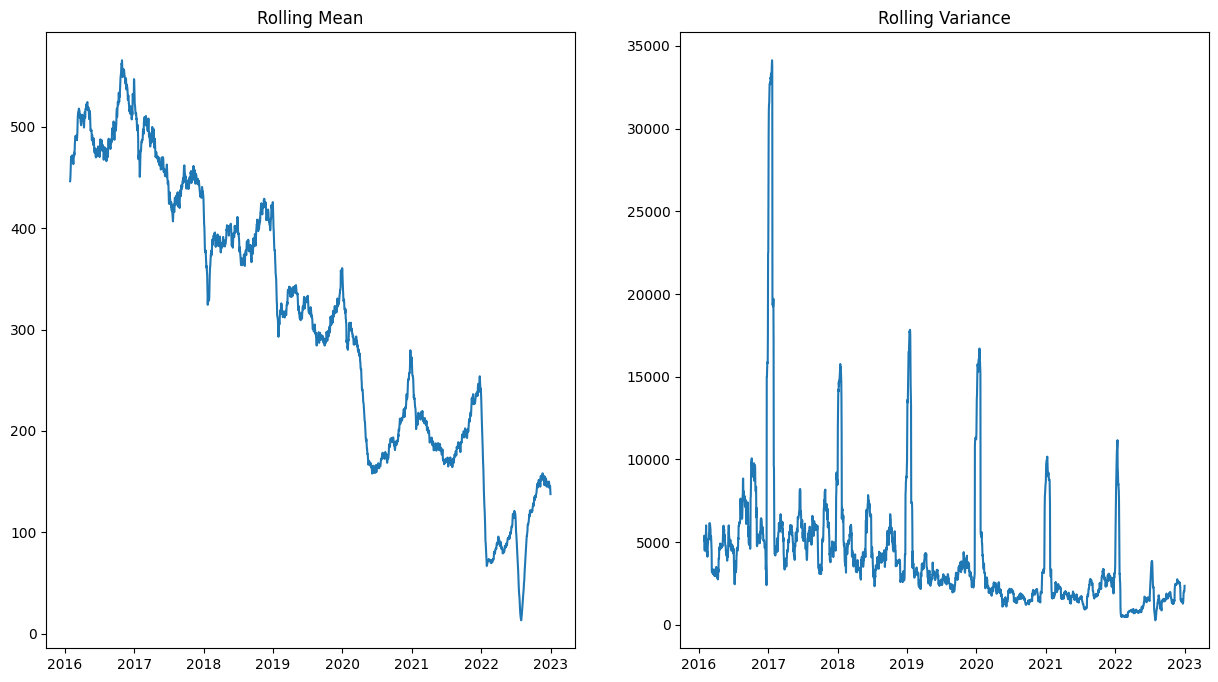

In [104]:
rolling_mean = roubos_dia.rolling(window=30).mean()
rolling_var = roubos_dia.rolling(window=30).var()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.set_title("Rolling Mean")
ax1.plot(rolling_mean)
ax2.set_title("Rolling Variance")
ax2.plot(rolling_var)

In [105]:
from sklearn import tree

In [106]:
X, y = roubos_dia.index, roubos_dia.values

In [107]:
estacao = (X.month - 1) // 3

In [108]:
X = np.array([
    X.year, X.month, X.day, X.weekday, estacao
])

In [109]:
X = X.T

In [110]:
regressor = tree.DecisionTreeRegressor(max_depth=3, min_samples_leaf=50)

In [111]:
regressor.fit(X, y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=50)

In [112]:
y_pred = regressor.predict(X)

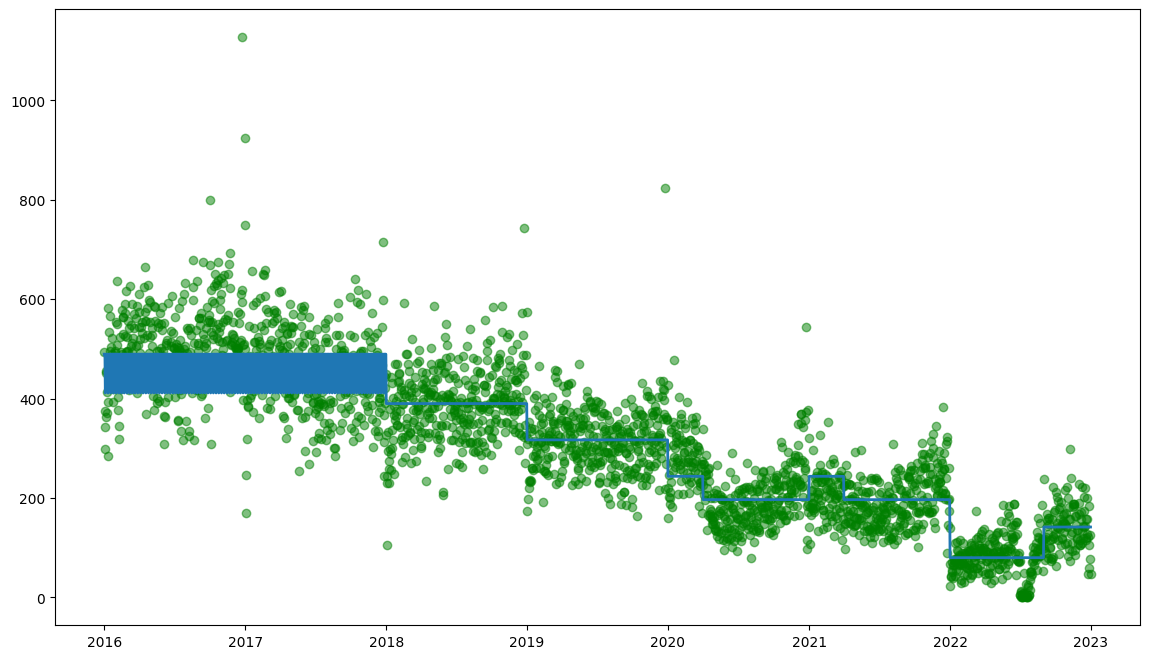

In [113]:
plt.figure(figsize=(14, 8))
plt.scatter(roubos_dia.index, roubos_dia, alpha=.5, c='g')
plt.plot(roubos_dia.index, y_pred, linewidth=2)

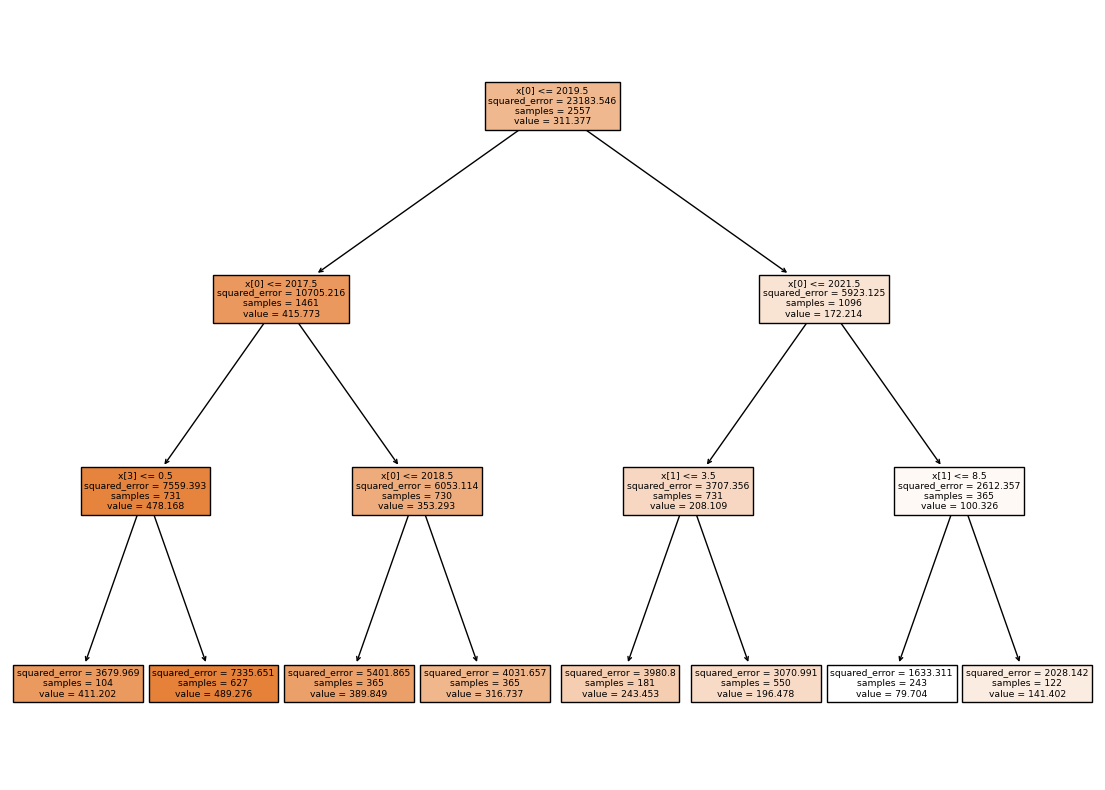

In [114]:
plt.figure(figsize=(14, 10))
tree.plot_tree(regressor, filled=True)
plt.show()

In [115]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [116]:
arima = ARIMA(y, order=(2, 2, 1))

In [117]:
arima_result = arima.fit()

In [118]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2557
Model:                 ARIMA(2, 2, 1)   Log Likelihood              -14562.697
Date:                Mon, 05 Jun 2023   AIC                          29133.393
Time:                        11:42:46   BIC                          29156.777
Sample:                             0   HQIC                         29141.873
                               - 2557                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3999      0.012    -33.976      0.000      -0.423      -0.377
ar.L2         -0.2044      0.016    -12.737      0.000      -0.236      -0.173
ma.L1         -0.9998      0.062    -16.211      0.000      -1.121      -0.879
sigma2      5209.1057    325.675     15.995      0.000    4570.795    5847.417
===================================================================================
Ljung-Box (L1) (Q):                   4.46   Jarque-Bera (JB):              1928.28
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

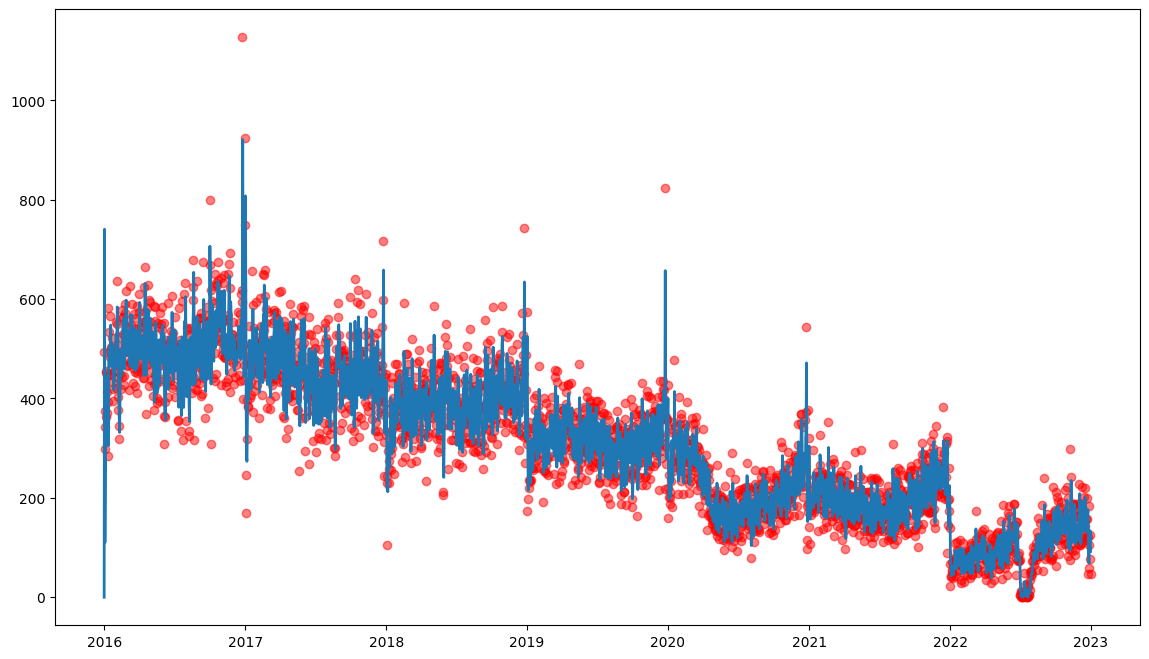

In [119]:
plt.figure(figsize=(14, 8))
plt.scatter(roubos_dia.index, roubos_dia, alpha=.5, c='r')
plt.plot(roubos_dia.index, arima_result.fittedvalues, linewidth=2)

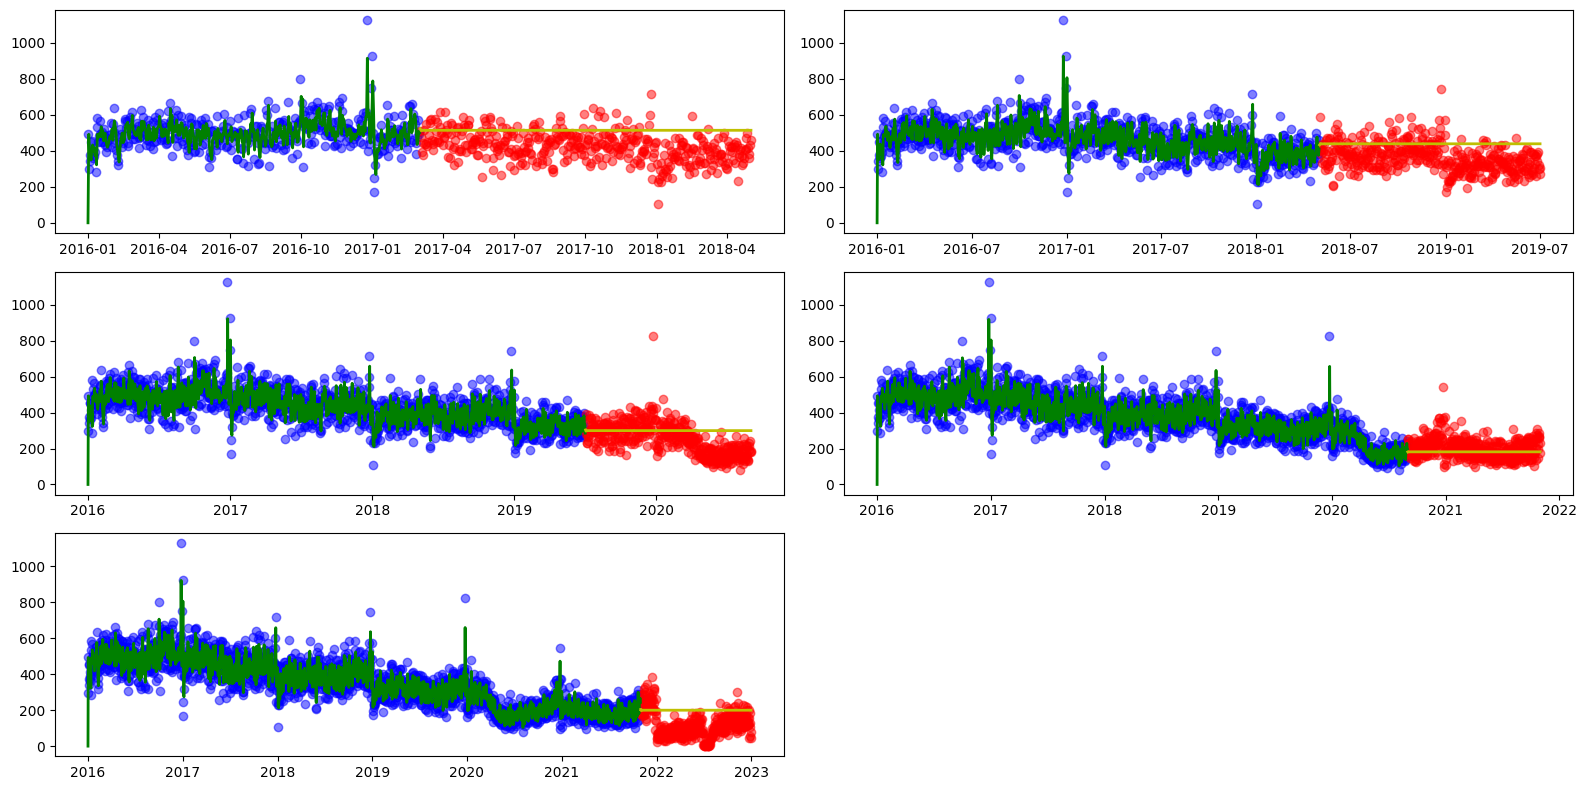

In [120]:
mse = []
mae = []
plt.figure(figsize=(16, 8))
spliter = TimeSeriesSplit(n_splits=5)
for i, (train_i, test_i) in enumerate(spliter.split(roubos_dia)):
    plt.subplot(3, 2, i+1)
    y_train = roubos_dia.iloc[train_i]
    y_test = roubos_dia.iloc[test_i]
    arima = ARIMA(y_train, order=(2,1,0))
    result = arima.fit()
    fitted = result.fittedvalues
    #y_pred = result.predict(start=y_test.index[0], end=y_test.index[-1], dynamic=True)
    y_pred = result.forecast(steps=len(y_test))
    mse.append(mean_squared_error(y_test, y_pred))
    mae.append(mean_absolute_error(y_test, y_pred))
    
    plt.scatter(y_train.index, y_train, c='b', alpha=.5)
    plt.plot(y_train.index, fitted, c='g', linewidth=2)

    plt.scatter(y_test.index, y_test, c='r', alpha=.5)
    plt.plot(y_test.index, y_pred, c='y', linewidth=2)
plt.tight_layout()

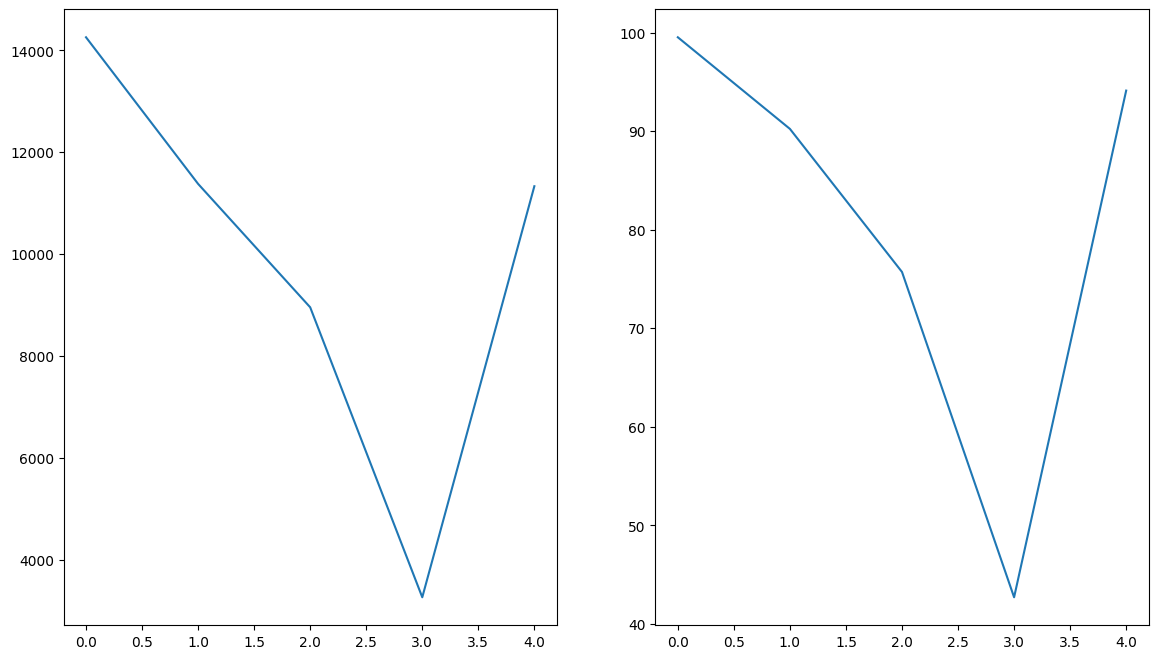

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
ax1.plot(mse)
ax2.plot(mae)

In [122]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

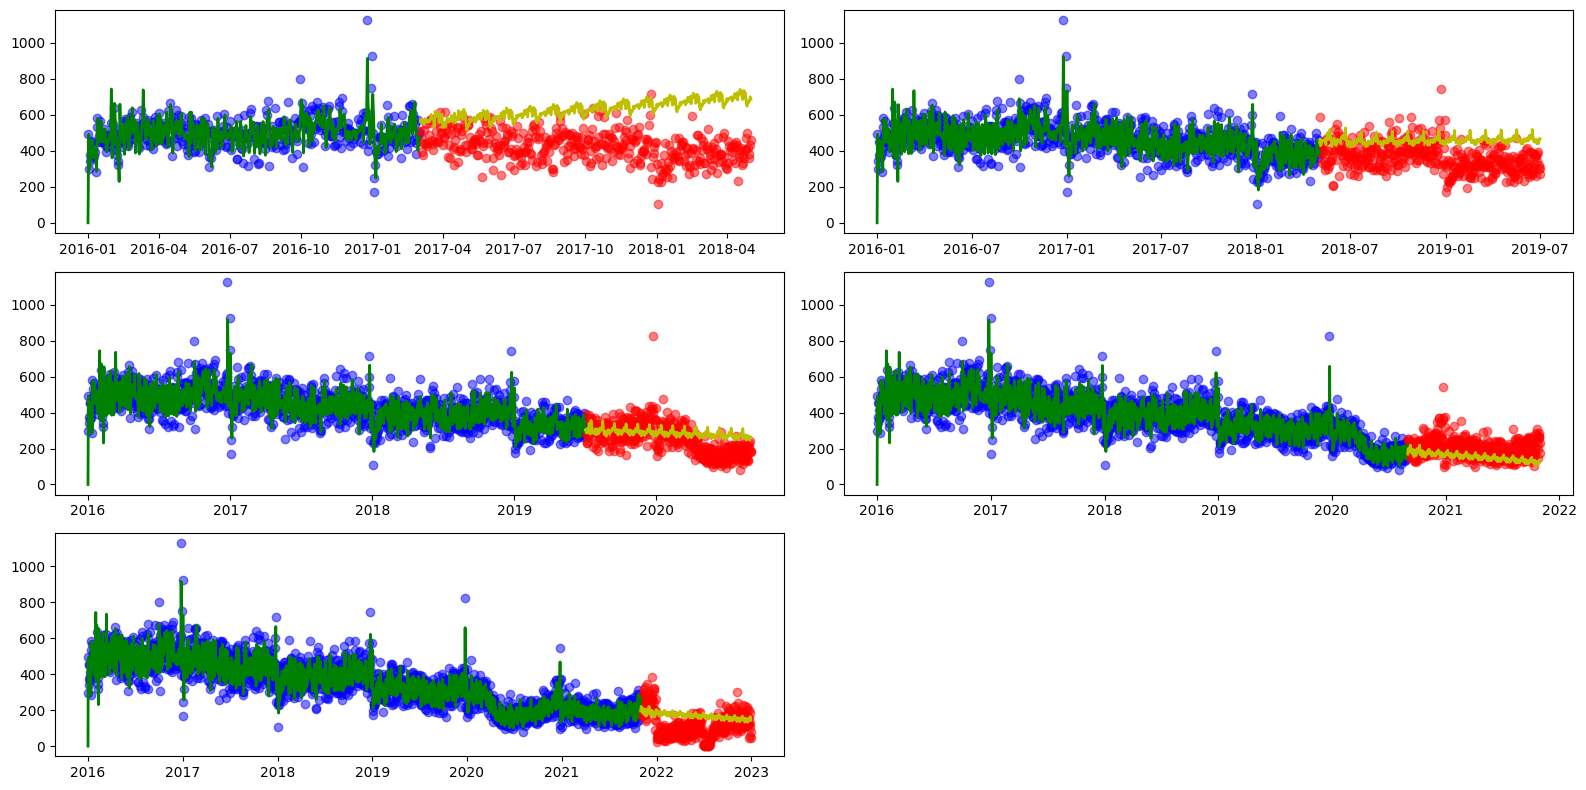

In [123]:
mse = []
mae = []
plt.figure(figsize=(16, 8))
spliter = TimeSeriesSplit(n_splits=5)
for i, (train_i, test_i) in enumerate(spliter.split(roubos_dia)):
    plt.subplot(3, 2, i+1)
    y_train = roubos_dia.iloc[train_i]
    y_test = roubos_dia.iloc[test_i]
    arima = SARIMAX(y_train, order=(2,1,0), seasonal_order=(2, 1, 1, 30))
    result = arima.fit()
    fitted = result.fittedvalues
    #y_pred = result.predict(start=y_test.index[0], end=y_test.index[-1], dynamic=True)
    y_pred = result.forecast(steps=len(y_test))
    mse.append(mean_squared_error(y_test, y_pred))
    mae.append(mean_absolute_error(y_test, y_pred))
    
    plt.scatter(y_train.index, y_train, c='b', alpha=.5)
    plt.plot(y_train.index, fitted, c='g', linewidth=2)

    plt.scatter(y_test.index, y_test, c='r', alpha=.5)
    plt.plot(y_test.index, y_pred, c='y', linewidth=2)
plt.tight_layout()

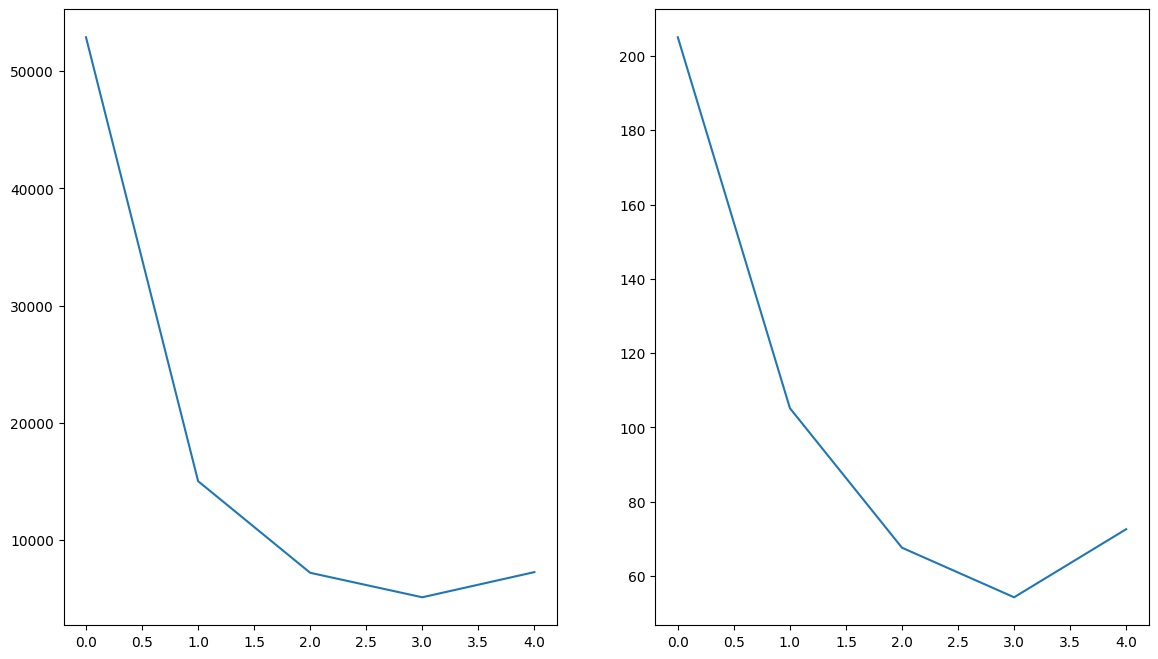

In [124]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
ax1.plot(mse)
ax2.plot(mae)

In [125]:
import joblib

In [126]:
joblib.dump(arima, 'model_forecast_roubos.pkl')

['model_forecast_roubos.pkl']